In [1]:
# Подключение к Google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
PATH = '/content/drive/My Drive/GU_neural_network/'

In [0]:
import sys
sys.path.append(PATH)

In [4]:
!pip install mnist

In [5]:
!pip install keras

## Практическое задание

<ol>
    <li>Попробуйте обучить нейронную сеть на Keras с другими параметрами. 
        Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?</li>
    <li>Поработайте с документацией Keras.</li>
</ol>

## Библотеки

In [6]:
import numpy as np
import mnist
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras import regularizers

Using TensorFlow backend.


## Подготовка данных

In [0]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

## Подготовка и анализ моделей

### Функция базовая модель

In [0]:
def create_model(name='baseline', num_classes=10, count_inner_layers = 1, nodes = 64, use_bn=False, use_dp=False, optimizer='adam', inner_fuction='relu', l1=0, l2=0):
  # Build the model.

  model = Sequential(name=name)
  model.add(Dense(nodes, activation='relu', input_shape=(784,)))

  for i in range(count_inner_layers):
    model.add(Dense(nodes, activation=inner_fuction, 
                    kernel_regularizer=regularizers.l2(l2),
                    activity_regularizer=regularizers.l1(l1)))
    if use_dp:
      model.add(Dropout(0.5))
    if use_bn:
      model.add(BatchNormalization(axis=-1))
    if use_dp:
      model.add(Dropout(0.5))
    if use_bn:
      model.add(BatchNormalization(axis=-1))
  model.add(Dense(num_classes, activation='softmax'))
  # Compile the model
  model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )
  return model

### Генерация списка моделей

In [0]:
models = []
models.append(create_model(name='baseline', use_bn=False, use_dp=False, optimizer='adam'))
models.append(create_model(name='BatchNormalization', count_inner_layers=0, use_bn=True,  use_dp=False, optimizer='adam'))
models.append(create_model(name='Dropout', count_inner_layers=0, use_bn=False, use_dp=True, optimizer='adam'))
models.append(create_model(name='Dropout and BatchNormalization', count_inner_layers=0, use_bn=True, use_dp=True, optimizer='adam'))
models.append(create_model(name='baseline_regularize l2=l1=0.1', use_bn=False, use_dp=False, optimizer='adam', l1=0.1, l2=0.1))
models.append(create_model(name='baseline_regularize l2=l1=0.01', use_bn=False, use_dp=False, optimizer='adam', l1=0.01, l2=0.01))
models.append(create_model(name='baseline_regularize l2=0.01', use_bn=False, use_dp=False, optimizer='adam', l2=0.01))
models.append(create_model(name='baseline_regularize l1=0.01', use_bn=False, use_dp=False, optimizer='adam', l1=0.01))
models.append(create_model(name='sigmoid', use_bn=False, use_dp=False, optimizer='adam', inner_fuction='sigmoid'))
models.append(create_model(name='Specific_optimizer', use_bn=False, use_dp=False, optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)))
models.append(create_model(name='rmsprop_optimizer', use_bn=False, use_dp=False, optimizer='rmsprop'))
for i in [0, 7, 15]:
  models.append(create_model(count_inner_layers=i, name=f'model_{i}_layers'))

for i in [32, 128]:
  models.append(create_model(nodes=i, name=f'model_{i}_nodes'))

In [10]:
history = {}
for model in models:
  print(f'{model.name}{"_"*100}')
  history[model.name] = model.fit(train_images, to_categorical(train_labels),
                                  epochs=30,
                                  batch_size=64,
                                  validation_data=(test_images, to_categorical(test_labels))
                                  )

baseline____________________________________________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 58us/step - loss: 0.3884 - accuracy: 0.8842 - val_loss: 0.2145 - val_accuracy: 0.9363
Epoch 2/30
60000/60000 [==============================] - 3s 54us/step - loss: 0.2005 - accuracy: 0.9399 - val_loss: 0.1743 - val_accuracy: 0.9461
Epoch 3/30
60000/60000 [==============================] - 3s 57us/step - loss: 0.1518 - accuracy: 0.9536 - val_loss: 0.1417 - val_accuracy: 0.9553
Epoch 4/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.1241 - accuracy: 0.9625 - val_loss: 0.1352 - val_accuracy: 0.9579
Epoch 5/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.1074 - accuracy: 0.9670 - val_loss: 0.1186 - val_accuracy: 0.9658
Epoch 6/30
60000/60000 [==============================] - 3s 54us/step - loss: 0.0967 - accuracy: 0.9693 -

In [11]:
best_model = 'baseline'
best_loss = 1
best_accuracy = 0

for model in models:
  print(f'{model.name}')
  score = model.evaluate(test_images, to_categorical(test_labels), verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])

  if best_loss>score[0]:
    best_model = model.name
    best_loss = score[0]
    best_accuracy = score[1]

baseline
Test loss: 0.13480801417358598
Test accuracy: 0.972100019454956
BatchNormalization
Test loss: 0.10556105499344412
Test accuracy: 0.9714999794960022
Dropout
Test loss: 0.10074980113043275
Test accuracy: 0.9732999801635742
Dropout and BatchNormalization
Test loss: 0.11505179586498998
Test accuracy: 0.9722999930381775
baseline_regularize l2=l1=0.1
Test loss: 2.3010994998931884
Test accuracy: 0.11349999904632568
baseline_regularize l2=l1=0.01
Test loss: 2.301035827636719
Test accuracy: 0.11349999904632568
baseline_regularize l2=0.01
Test loss: 0.11993600675463677
Test accuracy: 0.9710000157356262
baseline_regularize l1=0.01
Test loss: 2.3010646434783935
Test accuracy: 0.11349999904632568
sigmoid
Test loss: 0.08999142321600812
Test accuracy: 0.9733999967575073
Specific_optimizer
Test loss: 0.1243864276755281
Test accuracy: 0.9715999960899353
rmsprop_optimizer
Test loss: 0.1672192263763944
Test accuracy: 0.9725000262260437
model_0_layers
Test loss: 0.10506151352749439
Test accuracy:

Вывод: лучшее значение метрики loss относительно базовой модели показала смена функции активации на сигмоиду

In [18]:
print(f'Best model:{best_model}, accuracy={best_accuracy}, loss={best_loss}')

Best model:sigmoid, accuracy=0.9733999967575073, loss=0.08999142321600812


#### Функция построяния графиков

In [0]:
import matplotlib.pyplot as plt

def plot_history(history):
  fig = plt.figure()
  fig.set_size_inches(15, 15)

  ax_1 = fig.add_subplot(2, 2, 1)
  ax_2 = fig.add_subplot(2, 2, 2)
  ax_3 = fig.add_subplot(2, 2, 3)
  ax_4 = fig.add_subplot(2, 2, 4)


  for key in history.keys():
    ax_1.plot(history[key].history['accuracy'], label=key)
    ax_2.plot(history[key].history['val_accuracy'], label=key)
    ax_3.plot(history[key].history['loss'], label=key)
    ax_4.plot(history[key].history['val_loss'], label=key)

  ax_1.set(title = 'Model accuracy on train data', label='Accuracy', xlabel='Epoch')
  ax_1.legend(loc='lower right')
  ax_2.set(title = 'Model accuracy on test data', label='Accuracy', xlabel='Epoch')
  ax_2.legend(loc='lower right')
  ax_3.set(title = 'Model loss on train data', label='loss', xlabel='Epoch')
  ax_3.legend(loc='upper right')
  ax_4.set(title = 'Model loss on test data', label='loss', xlabel='Epoch')
  ax_4.legend(loc='upper right')

  plt.show()

#### Анализ использования разных слоев

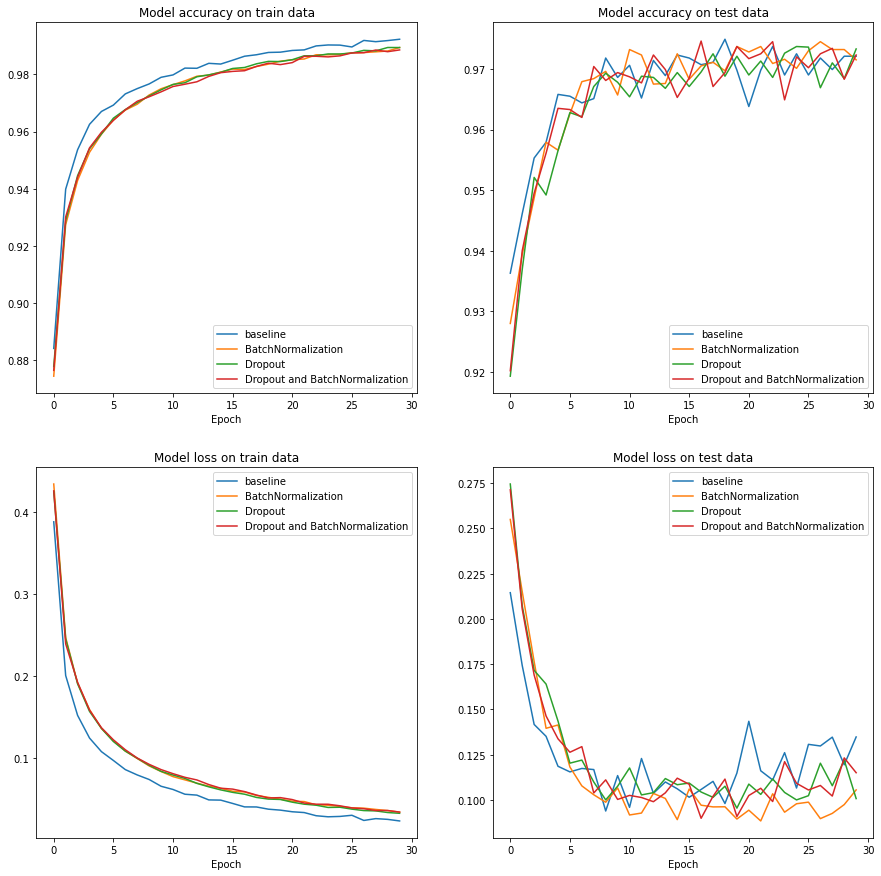

In [13]:
select_list = ['baseline', 'BatchNormalization', 'Dropout', 'Dropout and BatchNormalization']
filter_history = {k: v for k, v in history.items() if k in select_list}
plot_history(filter_history )

Вывод: несмотря на хорошие значения метрика базовая модель на валидационных данных хорошо показала BathNormalization

#### Анализ регуляризации

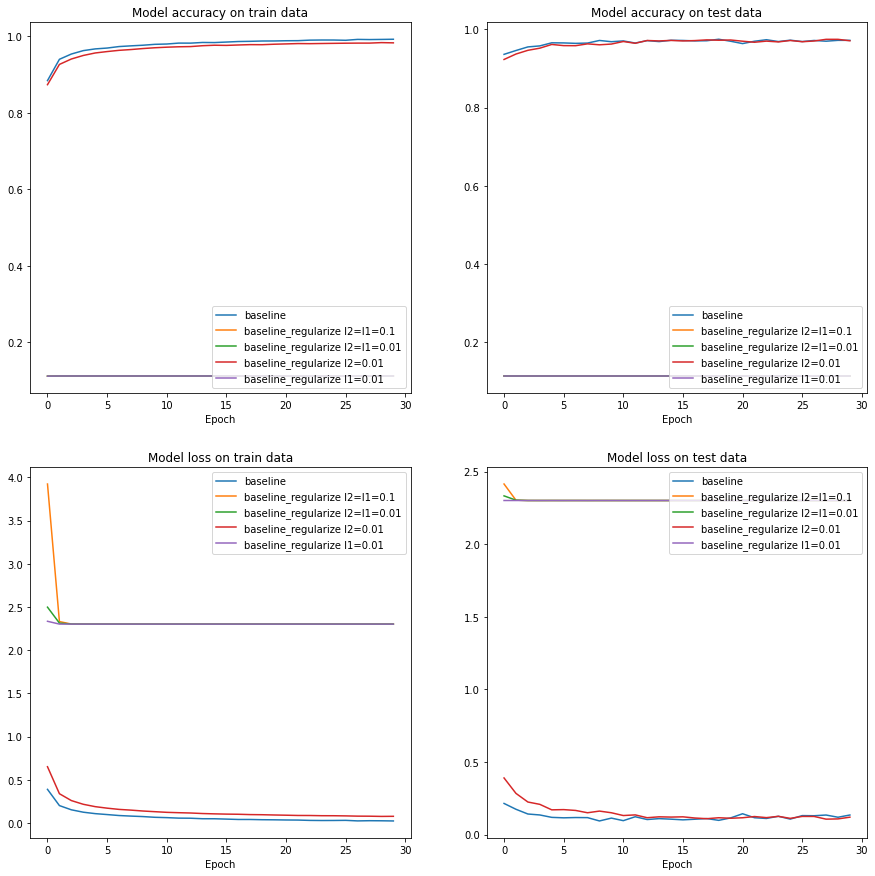

In [14]:
select_list = ['baseline', 'baseline_regularize l2=l1=0.1', 'baseline_regularize l2=l1=0.01', 'baseline_regularize l2=0.01', 'baseline_regularize l1=0.01']
filter_history = {k: v for k, v in history.items() if k in select_list}
plot_history(filter_history )

Вывод: выбранные параметры регуляризации не показали улучшения качества. 

#### Сравнение оптимизаторов и активационных функций

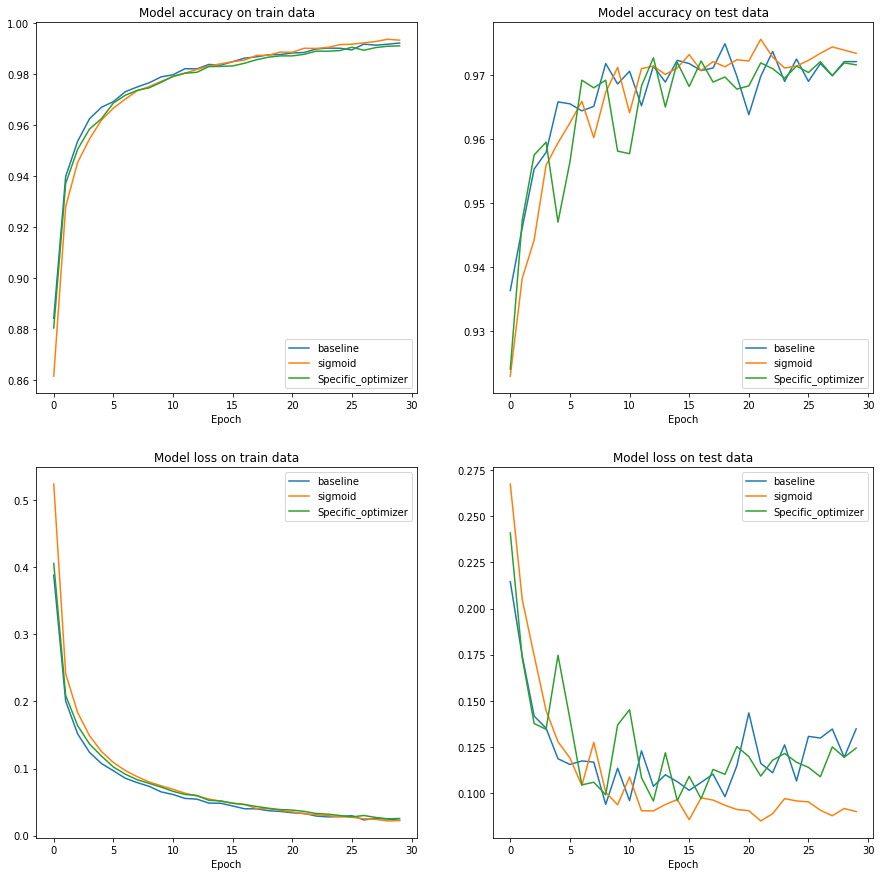

In [15]:
select_list = ['baseline',  'sigmoid', 'Specific_optimizer', 'Specific_optimizer']
filter_history = {k: v for k, v in history.items() if k in select_list}
plot_history(filter_history )

Вывод: Функция активации сигмоида показала себя лучше базовой модели.

#### Сравнение количества слоев

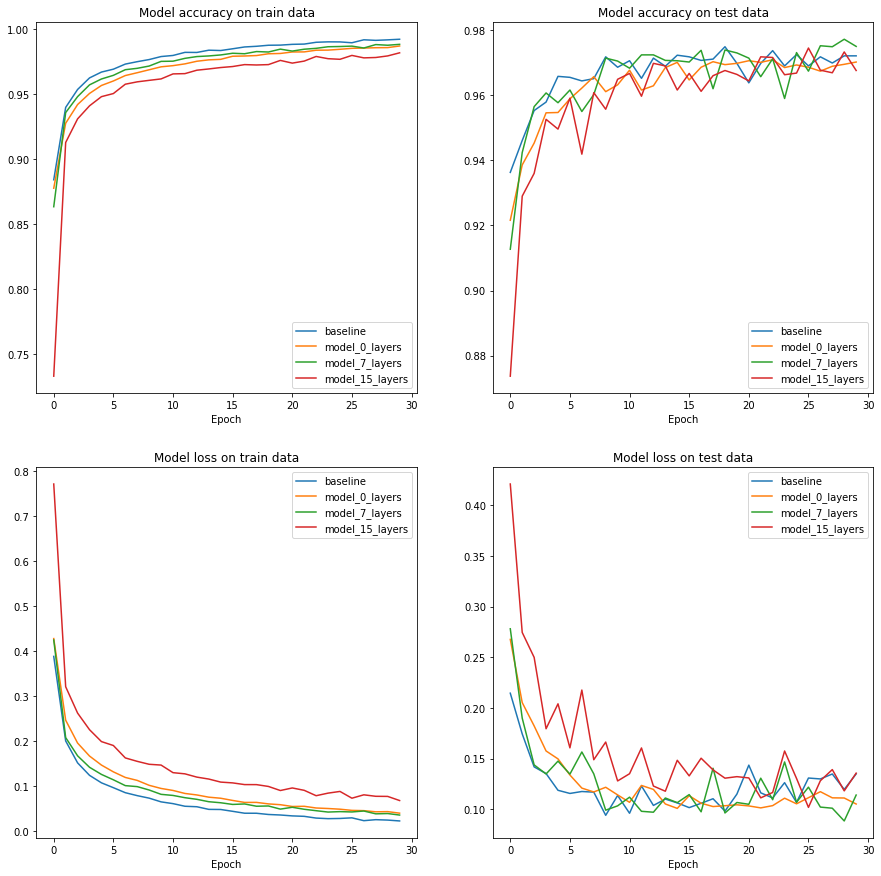

In [16]:
select_list = ['baseline', 'model_0_layers', 'model_7_layers', 'model_15_layers']
filter_history = {k: v for k, v in history.items() if k in select_list}
plot_history(filter_history )

Вывод: незначительное увеличение внутренних слоев до 7 дало лучшие значения метрик на валидационной выборке. Дальнейшее увеличение слове не дало значительных эффектов.

#### Сравнение количества нейронов в слоях

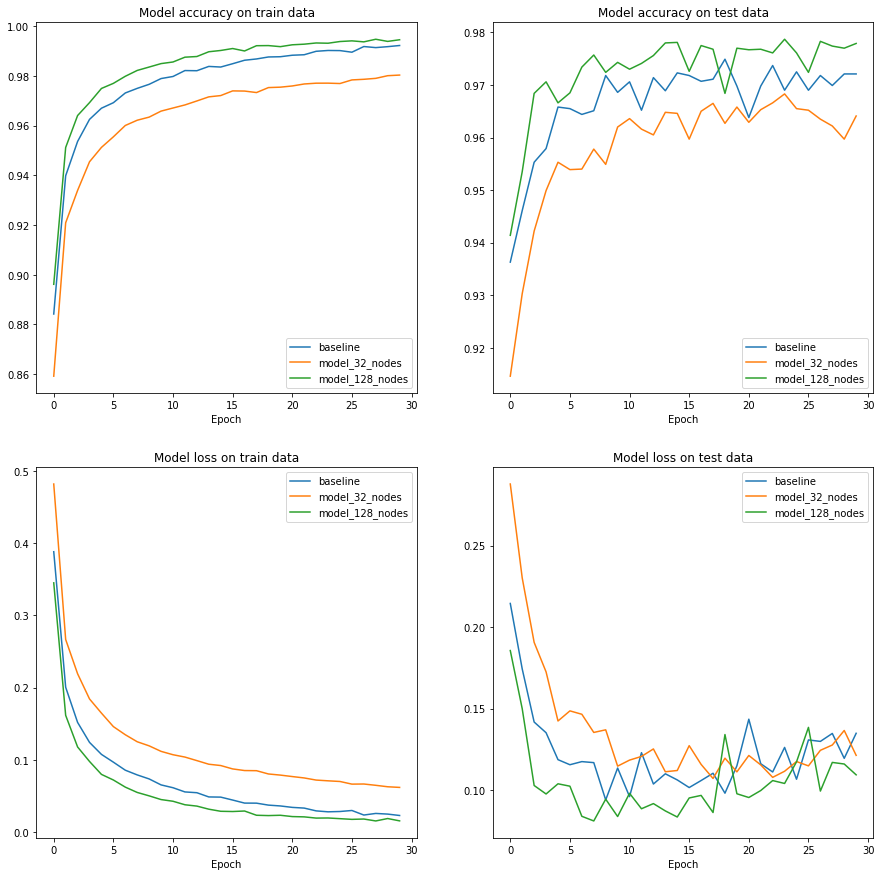

In [17]:
select_list = ['model_32_nodes','baseline', 'model_128_nodes']
filter_history = {k: v for k, v in history.items() if k in select_list}
plot_history(filter_history )

Вывод: увеличение количества нейронов показало улучшение метрик

## Создадим модель со всеми параметрами, что дали прирост

In [0]:
synthetic_model = create_model(name='sigmoid_bn_layyers7_nodes_128', nodes=128, use_bn=True, count_inner_layers=7, optimizer='adam', inner_fuction='sigmoid')

In [22]:
print(f'{synthetic_model.name}{"_"*100}')
history[synthetic_model.name] = synthetic_model.fit(train_images, to_categorical(train_labels),
                                  epochs=30,
                                  batch_size=64,
                                  validation_data=(test_images, to_categorical(test_labels))
                                  )

sigmoid_bn_layyers7_nodes_128____________________________________________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 20s 326us/step - loss: 0.3190 - accuracy: 0.9024 - val_loss: 0.6662 - val_accuracy: 0.7820
Epoch 2/30
60000/60000 [==============================] - 17s 283us/step - loss: 0.1776 - accuracy: 0.9449 - val_loss: 0.3780 - val_accuracy: 0.8775
Epoch 3/30
60000/60000 [==============================] - 17s 284us/step - loss: 0.1428 - accuracy: 0.9554 - val_loss: 0.8653 - val_accuracy: 0.7769
Epoch 4/30
60000/60000 [==============================] - 17s 288us/step - loss: 0.1209 - accuracy: 0.9624 - val_loss: 0.3368 - val_accuracy: 0.8875
Epoch 5/30
60000/60000 [==============================] - 17s 276us/step - loss: 0.1090 - accuracy: 0.9654 - val_loss: 0.4229 - val_accuracy: 0.8598
Epoch 6/30
60000/60000 [==============================] - 17s 285us/step - 

In [23]:
print(f'{synthetic_model.name}')
score = synthetic_model.evaluate(test_images, to_categorical(test_labels), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

sigmoid_bn_layyers7_nodes_128
Test loss: 0.2517258522223681
Test accuracy: 0.9344000220298767


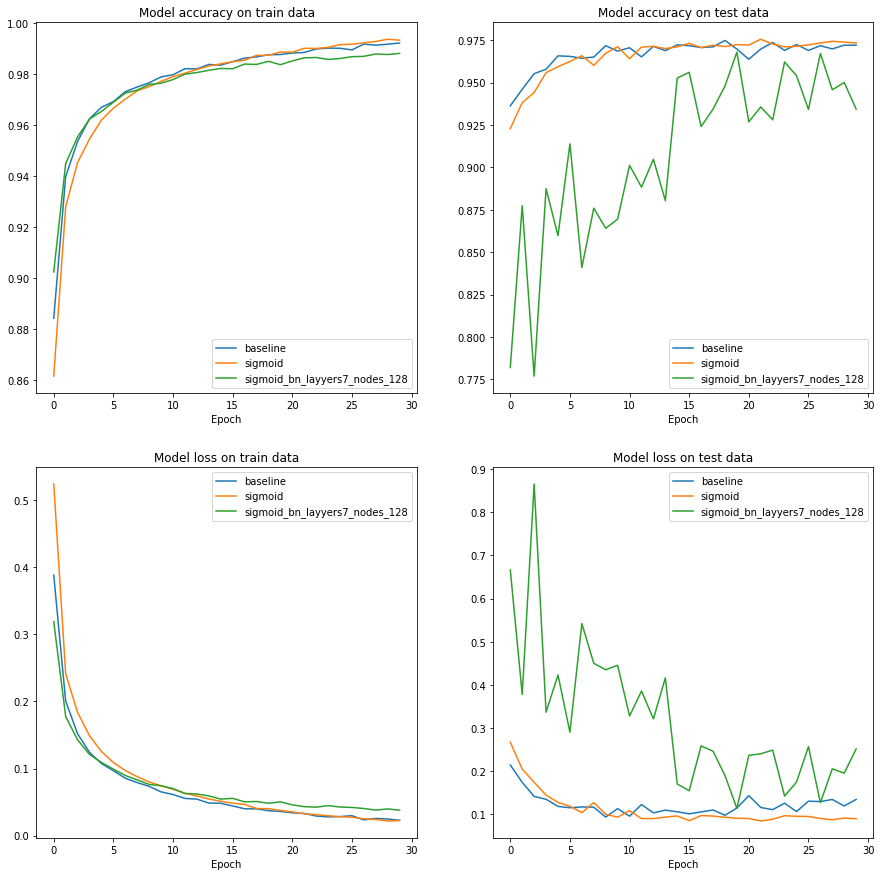

In [25]:
select_list = [best_model, 'baseline', synthetic_model.name]
filter_history = {k: v for k, v in history.items() if k in select_list}
plot_history(filter_history )

Вывод: накидать все параметры можно хорошо увидеть, что не все приводяь к хорошему результату. Вероятно, так влияет чрезмерная  BathNormalization.

In [26]:
synthetic_model = create_model(name='sigmoid_layyers7_nodes_128', nodes=128, count_inner_layers=7, optimizer='adam', inner_fuction='sigmoid')
print(f'{synthetic_model.name}{"_"*100}')
history[synthetic_model.name] = synthetic_model.fit(train_images, to_categorical(train_labels),
                                  epochs=30,
                                  batch_size=64,
                                  validation_data=(test_images, to_categorical(test_labels))
                                  )

sigmoid_layyers7_nodes_128____________________________________________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 81us/step - loss: 1.7231 - accuracy: 0.2832 - val_loss: 1.1462 - val_accuracy: 0.4782
Epoch 2/30
60000/60000 [==============================] - 4s 75us/step - loss: 0.7036 - accuracy: 0.7573 - val_loss: 0.4552 - val_accuracy: 0.8859
Epoch 3/30
60000/60000 [==============================] - 5s 80us/step - loss: 0.3428 - accuracy: 0.9162 - val_loss: 0.2901 - val_accuracy: 0.9312
Epoch 4/30
60000/60000 [==============================] - 5s 82us/step - loss: 0.2640 - accuracy: 0.9345 - val_loss: 0.2393 - val_accuracy: 0.9418
Epoch 5/30
60000/60000 [==============================] - 5s 78us/step - loss: 0.2043 - accuracy: 0.9478 - val_loss: 0.1811 - val_accuracy: 0.9535
Epoch 6/30
60000/60000 [==============================] - 5s 76us/step - loss: 0.1712 - 

In [27]:
print(f'{synthetic_model.name}')
score = synthetic_model.evaluate(test_images, to_categorical(test_labels), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

sigmoid_layyers7_nodes_128
Test loss: 0.11271286797802896
Test accuracy: 0.9732000231742859


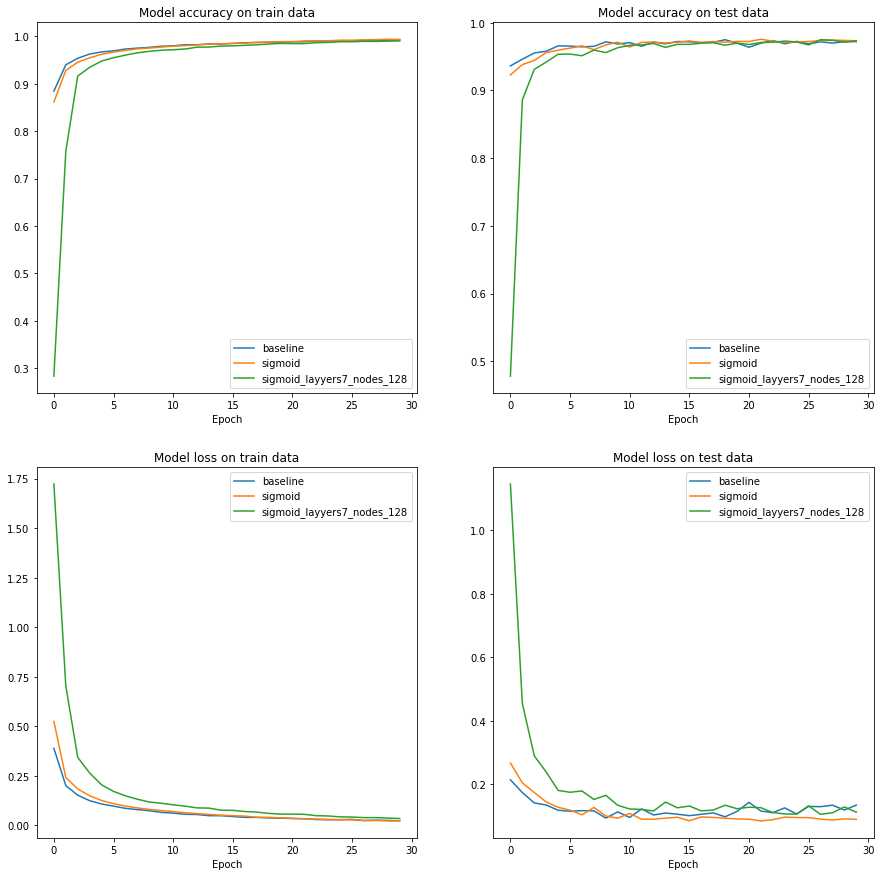

In [28]:
select_list = [best_model, 'baseline', synthetic_model.name]
filter_history = {k: v for k, v in history.items() if k in select_list}
plot_history(filter_history )

Вывод: значительного прироста получить не удалось. На текущий момент модель с 1 внутренним слоем и функцией активации сигмоида показала лучшие результаты.